In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
%matplotlib inline


Bad key savefig.frameon in file C:\Users\sator\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\sator\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\sator\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probab

In [3]:
combined_df = pd.read_csv('combined_binary_df.csv', index_col='date', infer_datetime_format=True, parse_dates=True)

In [4]:
X = combined_df.drop(columns = 'class')
y = combined_df['class']

In [5]:
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [6]:
# set parameters to compare
search_params = {
    'n_estimators'      : [5, 10, 20, 30, 50, 100, 300],
    'max_features'      : [i for i in range(1,X_train.shape[1])],
    'random_state'      : [1],
    'n_jobs'            : [1],
    'min_samples_split' : [3, 5, 10, 15, 20, 25, 30, 40, 50, 100],
    'max_depth'         : [3, 5, 10, 15, 20, 25, 30, 40, 50, 100]
}

In [7]:
# use GridSearch to find best prameters and train the model with them
gsc = GridSearchCV(
    RandomForestClassifier(),
    search_params,
    cv = 3,
    n_jobs = -1,
    verbose=True)

In [8]:
# train the model
gsc.fit(X_train, y_train)

Fitting 3 folds for each of 4900 candidates, totalling 14700 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15, 20, 25, 30, 40, 50, 100],
                         'max_features': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [3, 5, 10, 15, 20, 25, 30, 40, 50,
                                               100],
                         'n_estimators': [5, 10, 20, 30, 50, 100, 300],
                         'n_jobs': [1], 'random_state': [1]},
             verbose=True)

In [9]:
# view the best parameters
gsc.best_estimator_

RandomForestClassifier(max_depth=25, max_features=2, min_samples_split=3,
                       n_estimators=5, n_jobs=1, random_state=1)

In [10]:
# view the accuracy of the model
score = gsc.best_estimator_.score(X_test, y_test)
print("%0.2f accuracy" % (score))

0.52 accuracy


In [11]:
predicted = gsc.best_estimator_.predict(X_test)

In [12]:
from sklearn.metrics import classification_report

In [13]:
# create classification report
classification_report(y_test, predicted)

'              precision    recall  f1-score   support\n\n         0.0       0.47      0.47      0.47       132\n         1.0       0.56      0.56      0.56       158\n\n    accuracy                           0.52       290\n   macro avg       0.52      0.52      0.52       290\nweighted avg       0.52      0.52      0.52       290\n'

In [16]:
# list the features by importance
sorted(zip(gsc.best_estimator_.feature_importances_, X.columns), reverse=True)

[(0.14704778545438343, 'google trend'),
 (0.14281826335418596, 'google buzzword score'),
 (0.13574812453676063, 'volume'),
 (0.13191278051047967, 'Google positive'),
 (0.12484495090394924, 'Google negative'),
 (0.11755581905164154, 'Reddit negative'),
 (0.10818493749514387, 'reddit buzzword score'),
 (0.09188733869345563, 'Reddit positive')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

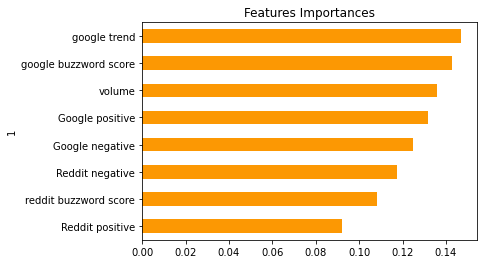

In [19]:
# visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(gsc.best_estimator_.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='#FC9803', title= 'Features Importances', legend=False)